In [284]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Read data from the spreadsheet
data = pd.read_csv("cleaned_mlready_combinedData1.csv")

In [285]:
# check out fire and no fire ratio
data["Fire"].value_counts()

0    7156
1     115
Name: Fire, dtype: int64

In [286]:
# divide data into train, and testing
X = data.copy()
y = X['Fire']
X = X.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [287]:
#Default training set, get a model baseline
clf_base = DecisionTreeClassifier(random_state=4)
clf_base = clf_base.fit(X_train, y_train)

In [288]:
#baseline predictions, amd confusion matrix of the baseline model
prediction_base = clf_base.predict(X_test)
confusion_matrix(y_test, prediction_base, labels=[0,1])

array([[1408,   27],
       [  17,    3]], dtype=int64)

In [289]:
#look at the importance of each feature
feature_names = X.columns
pd.DataFrame(clf_base.feature_importances_, index = feature_names)

0
T_DAILY_MAX               0.056596
 T_DAILY_AVG              0.077037
SOLARAD_DAILY             0.155500
SUR_TEMP_DAILY_MAX        0.093773
SUR_TEMP_DAILY_AVG        0.053424
RH_DAILY_MIN              0.044481
RH_DAILY_AVG              0.062145
SOIL_MOISTURE_5_DAILY     0.070142
SOIL_MOISTURE_10_DAILY    0.083854
SOIL_MOISTURE_20_DAILY    0.034054
SOIL_MOISTURE_50_DAILY    0.061062
SOIL_MOISTURE_100_DAILY   0.033943
SOIL_TEMP_5_DAILY         0.106173
SOIL_TEMP_10_DAILY        0.067816

In [290]:
#Get report on base model
print(classification_report(y_test,prediction_base))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1435
           1       0.10      0.15      0.12        20

    accuracy                           0.97      1455
   macro avg       0.54      0.57      0.55      1455
weighted avg       0.98      0.97      0.97      1455



In [291]:
#decision tree structure view
plt.figure(figsize=(150,150))
tree.plot_tree(clf_base,feature_names=  X.columns, fontsize = 50)
plt.show()

In [292]:
#cross validation of the base model
score = cross_val_score(clf_base, X, y, cv= 5, scoring="accuracy")
score

array([0.93814433, 0.95048143, 0.87001376, 0.97317744, 0.95667125])

In [293]:
#improved iteration1 decision tree training
clf_Iteration1 = DecisionTreeClassifier(class_weight={1:65,0:1}, max_depth=8, criterion="entropy", random_state=4)
clf_Iteration1 = clf_Iteration1.fit(X_train, y_train)

In [294]:
#make another prediction and show confusion matrix
predictions_iteration1 = clf_Iteration1.predict(X_test)
confusion_matrix(y_test, predictions_iteration1, labels=[0,1])

array([[1075,  360],
       [   5,   15]], dtype=int64)

In [295]:
clf_Iteration1.feature_importances_
feature_names = X.columns
pd.DataFrame(clf_Iteration1.feature_importances_, index = feature_names)

0
T_DAILY_MAX               0.000000
 T_DAILY_AVG              0.000000
SOLARAD_DAILY             0.000000
SUR_TEMP_DAILY_MAX        0.036450
SUR_TEMP_DAILY_AVG        0.000000
RH_DAILY_MIN              0.089146
RH_DAILY_AVG              0.003173
SOIL_MOISTURE_5_DAILY     0.549048
SOIL_MOISTURE_10_DAILY    0.000000
SOIL_MOISTURE_20_DAILY    0.153423
SOIL_MOISTURE_50_DAILY    0.034959
SOIL_MOISTURE_100_DAILY   0.000000
SOIL_TEMP_5_DAILY         0.050561
SOIL_TEMP_10_DAILY        0.083239

In [296]:
#Get report on base model
print(classification_report(y_test,predictions_iteration1))

              precision    recall  f1-score   support

           0       1.00      0.75      0.85      1435
           1       0.04      0.75      0.08        20

    accuracy                           0.75      1455
   macro avg       0.52      0.75      0.47      1455
weighted avg       0.98      0.75      0.84      1455



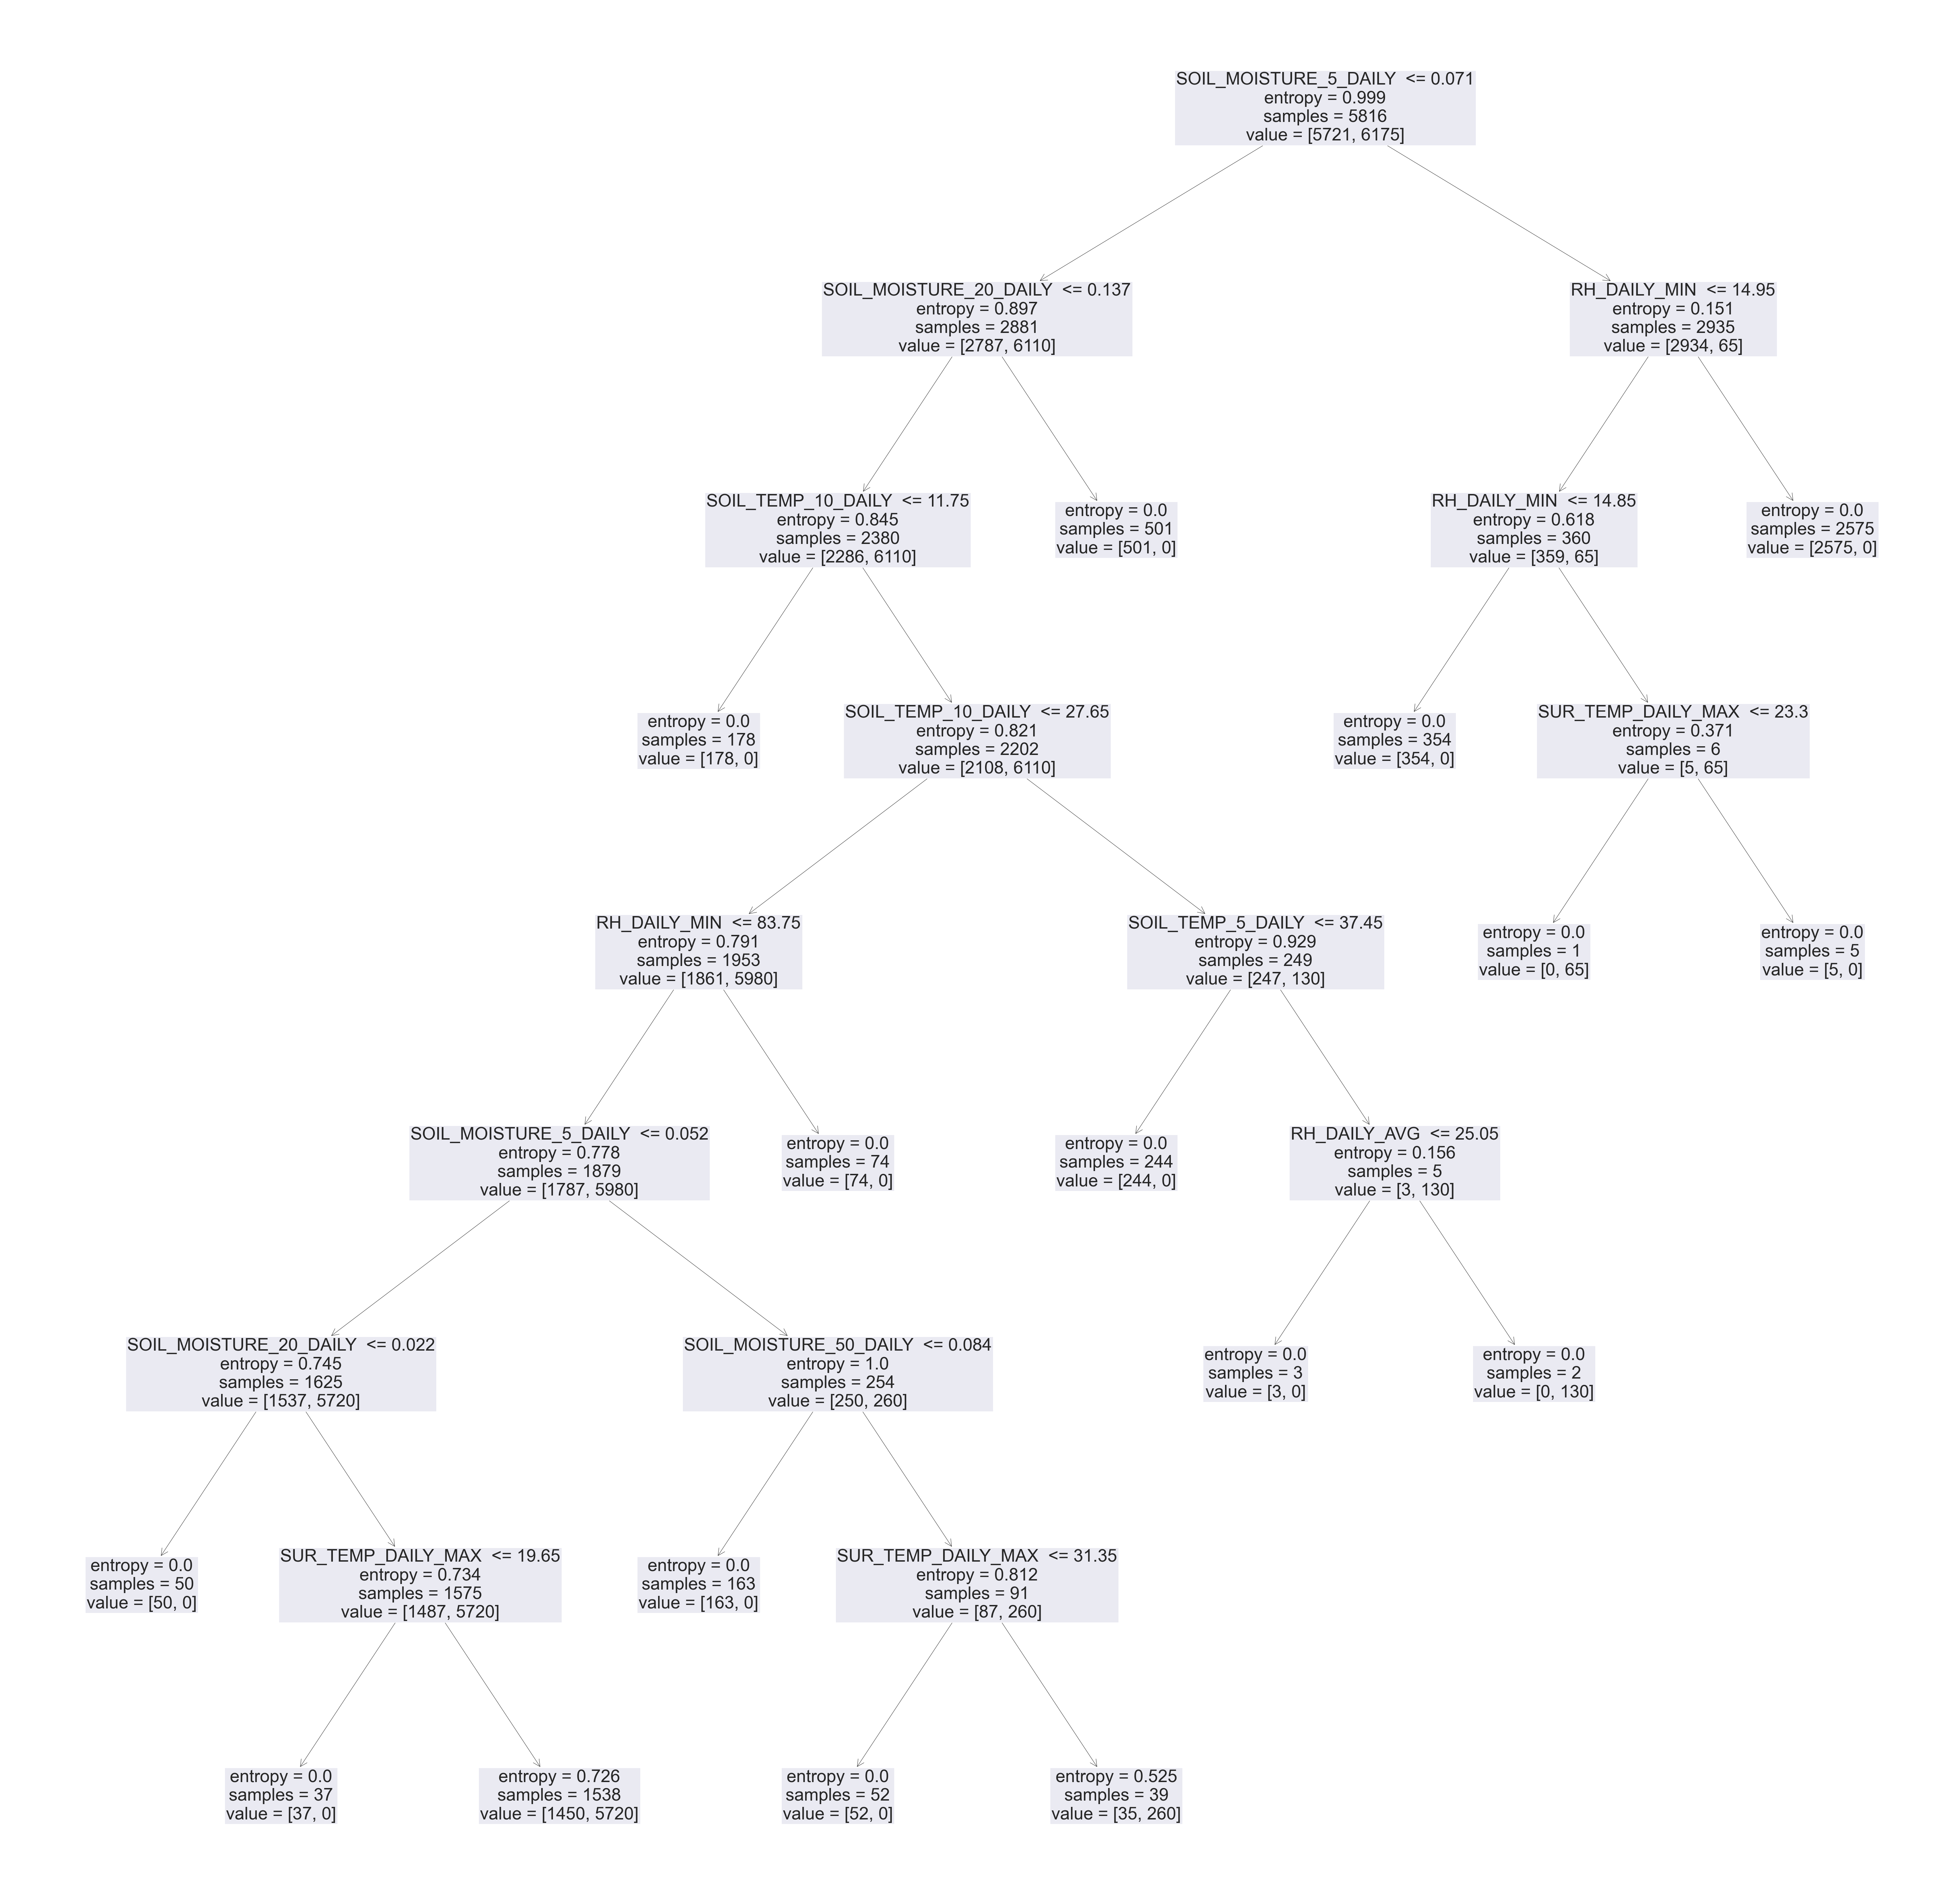

In [297]:
#Display the tree for iteration1
plt.figure(figsize=(100,100))
tree.plot_tree(clf_Iteration1,feature_names=  X.columns, fontsize = 50)
plt.show()

In [311]:
#cross validation score for iteration_1
cross_val_score(clf_Iteration1,X,y,scoring="recall", cv=3)

array([0.60526316, 0.64102564, 0.63157895])

In [276]:
#see the importance of different data
# clear more
#X = data.drop(['SOIL_MOISTURE_50_DAILY ', 'SOIL_MOISTURE_100_DAILY '], axis =1 )
#y = X['Fire']
#X = X.drop(['Fire'], axis =1 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
clf4 = DecisionTreeClassifier(class_weight={1:86,0:1}, max_depth=8, criterion="gini", random_state=4)
clf4 = clf4.fit(X_train, y_train)
feature_names = X.columns
pd.DataFrame(clf4.feature_importances_, index = feature_names)

0
T_DAILY_MAX               0.000000
 T_DAILY_AVG              0.000849
SOLARAD_DAILY             0.002436
SUR_TEMP_DAILY_MAX        0.000000
SUR_TEMP_DAILY_AVG        0.028802
RH_DAILY_MIN              0.061194
RH_DAILY_AVG              0.004894
SOIL_MOISTURE_5_DAILY     0.681263
SOIL_MOISTURE_10_DAILY    0.000000
SOIL_MOISTURE_20_DAILY    0.163364
SOIL_MOISTURE_50_DAILY    0.000000
SOIL_MOISTURE_100_DAILY   0.000000
SOIL_TEMP_5_DAILY         0.000000
SOIL_TEMP_10_DAILY        0.057199

In [277]:
predictions1 = clf4.predict(X_test)
confusion_matrix(y_test, predictions1, labels=[0,1])

array([[531, 185],
       [  3,   9]], dtype=int64)

In [278]:
accuracy_score(y_test, predictions1)

0.7417582417582418

In [146]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf4, X, y, cv= 5, scoring="accuracy")
score

array([0.74845361, 0.81086657, 0.74828061, 0.65337001, 0.803989  ])

In [9]:
#clf.predict_proba(X_test)

In [147]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y, cv= 5, scoring="accuracy")
score

array([0.74845361, 0.82393398, 0.74828061, 0.65337001, 0.81017882])

In [10]:
import graphviz
from sklearn import tree
#tree.plot_tree(clf)

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)


0.049019607843137254

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      2356
           1       0.05      0.80      0.09        44

    accuracy                           0.71      2400
   macro avg       0.52      0.75      0.46      2400
weighted avg       0.98      0.71      0.82      2400



In [420]:
score = cross_val_score(clf, X, y, cv= 5, scoring="accuracy")
score

array([0.7395189 , 0.79642366, 0.62242091, 0.63686382, 0.78335626])